# Exercise 8.1: Chaos on a Strange Attractor

(a) Lorenz used numerical integration to see what the trajectories would do in the long run. 

He studied the particular case: $\sigma = 10$, $b=8/3$, $r=28$. In what follows, we will also study the same parameters. 

The value of $r$ is just above the value of $r_H = \sigma(\sigma + b + 3)/(\sigma - b - 1) \simeq 24.74$. 

He began integrating from the initial condition $(x_0, y_0, z_0) = (0, 1, 0)$ close to the saddle point at the origin. 

(a) Plot $y(t)$ from $t=0$, to $t=100$.

You should see that after an initial transient, the solution settles into an irregular oscillation that persists as $t \rightarrow \infty$. 

(b) Lorenz discovered that a wonderful structure emerges if the solution is visualized as a trajectory in phase space.

Plot the trajectory of your solution in the $(x,z)$ phase space. You should see a "butterfly" pattern appearing. The trajectory appears to cross itself repeatedly, but that's just an artifact of projecting the 3D trajectory onto a 2D plane: in 3D, there are no self-intersections. 

This is a strange attractor, an attracting set of zero volume. 

## Exponential Divergence of Nearby Trajectories

The motion on the attractor exhibits a sensitive dependence on initial conditions. This means that two trajectories starting very close together will rapidly diverge from each other, and thereafter will have totally different futures. 
 
The practical implication is that long-term prediction becomes impossible in a system like this, where small uncertainties are amplified enormously fast. 

Suppose we let the transients decay, so that the trajectory is "on" the attractor. Suppose $\mathbf{x}(t)$ is a point on the attractor at time $t$, and consider a nearby point, say $\mathbf{x}(t) + \mathbf{\delta}(t)$, where $\mathbf{\delta}(t)$ is a tiny separation vector of initial length $|\mathbf{\delta_0}| \sim 10^{-7}$. Now watch $\mathbf{\delta}(t)$ grow. In numerical studies of the Lorenz attractor, one finds that:

$|\mathbf{\delta}(t)| \sim | \mathbf{\delta_0} | e^{\lambda t}$, where $\lambda >0$. Hence neighboring trajectories separate exponentially fast. 

(c) Plot $\log|\mathbf{\delta(t)}|$ versus $t$ and find the value of $\lambda$, also known as the Liapunov exponent. Focus on the region $t=15$ to $t=35$ to perform your straight line fit. 

Note that the curve is never exactly straight. The strength of the exponential divergence varies somewhat along the attractor. Also note that the exponential divergence must stop when the separation is comparable to the "diameter" of the attractor. 


## The Lorenz Map

(d) Lorenz found a beautiful way to analyze the dynamics on his strange attractor. He focused on $z_n$, the $n$-th *local maximum* of $z(t)$. 

Plot $z(t)$ versus $t$. 

(e) Lorenz had the idea that $z_n$ should predict $z_{n+1}$. 

Plot $z_{n+1}$ versus $z_n$. To find the maxima, you may use SciPy's functionality: 

```python
import numpy as np
from scipy.signal import argrelextrema

# generate an array with 100 random numbers:
x = np.random.random(100)

# get the indices that correspond to the local maxima:
maxima_indices = argrelextrema(x, np.greater)
```

The data from the chaotic time series appear to fall neatly on a curve, with almost no "thickness to the graph". 

The function $z_{n+1} = f(z_n)$ is now known as the *Lorenz map*. 



Solution: 

(a) Let's plot $y(t)$ for the initial values $(x_0,y_0,z_0) = (0,1,0)$ using the parameter values that Lorenz found. We will use SciPy's internal ODE solver here. 

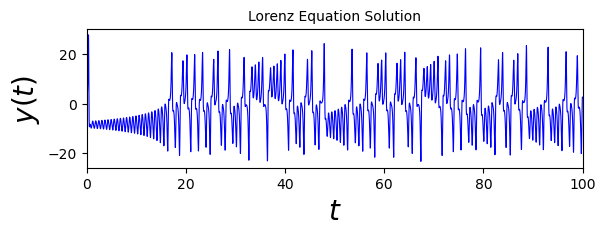

In [25]:
import scipy
import numpy as np

# the name of the function is: 
# scipy.integrate.solve_ivp, which by default uses the Runge-Kutta "45" method,
# a modified version of the Runge-Kutta 4-th order algo that has a variable step size. 

# fix the parameters to have the values that Lorenz used: 
sigma = 10
r = 28
b = 8/3

# first define the function vector
# y is a 3D vector here! t is necessary as well, but our function does not depend on time here
def func(t, y): 
    """Returns the function vector"""
    return [sigma * (y[1] - y[0]), 
            r * y[0] - y[1] - y[0] * y[2],
            y[0] * y[1] - b * y[2]]

# Now get the solution:
y0 = [0, 1, 0]
solarray = []
tmax = 100
t_eval = np.linspace(0, tmax, 10000)
t_range = (0, tmax)
sol = scipy.integrate.solve_ivp(func, t_range, y0, t_eval=t_eval)

# let's plot the solution:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$y(t)$', fontsize=20) # set the y label
ax.set_title('Lorenz Equation Solution', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(0,tmax)

ax.set_aspect(0.5)

ax.plot(sol.t, sol.y[1], color='blue', linestyle='-', lw=0.8)

(b) Using the same solution as above, let's visualize the Lorentz attractor on the $(x,z)$ plane.

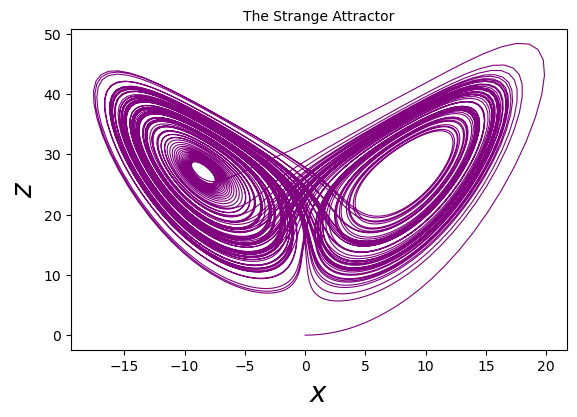

In [26]:
# let's plot the solution:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$z$', fontsize=20) # set the y label
ax.set_title('The Strange Attractor', fontsize=10) # set the title 

# set aspect ratio: 
ax.set_aspect(0.5)

# plot z versus x:
ax.plot(sol.y[0], sol.y[2], color='purple', linestyle='-', lw=0.8)

(c) Let's now solve the equations with initial condition:

$(x_0', y_0', z_0') = (0, 1+10^{-7}, 0)$

And plot $\log|\delta(t)|$ versus $t$ to get the value of the exponent $\lambda$. 

SciPy Linear Regression a, b=Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 [  0.94291598 -29.93013667]


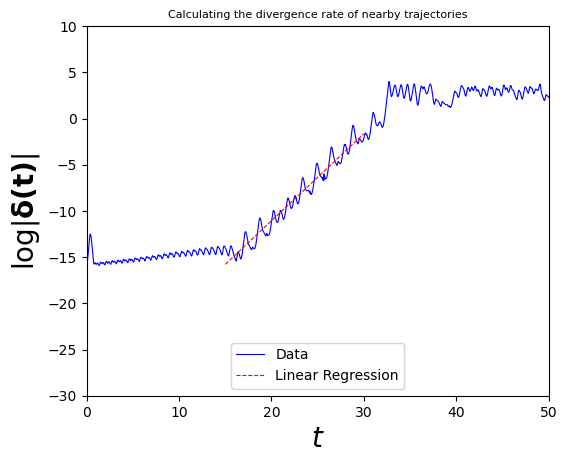

In [27]:
import scipy
import numpy as np
from scipy.optimize import curve_fit

# the name of the function is: 
# scipy.integrate.solve_ivp, which by default uses the Runge-Kutta "45" method,
# a modified version of the Runge-Kutta 4-th order algo that has a variable step size. 

# fix the parameters to have the values that Lorenz used: 
sigma = 10
r = 28
b = 8/3

# first define the function vector
# y is a 3D vector here! t is necessary as well, but our function does not depend on time here
def func(t, y): 
    """Returns the function vector"""
    return [sigma * (y[1] - y[0]), 
            r * y[0] - y[1] - y[0] * y[2],
            y[0] * y[1] - b * y[2]]

delta = 1E-7

# Now get the solution:
y0 = [0, 1+delta, 0]
solarray = []
tmax = 100
t_eval = np.linspace(0, tmax, 10000)
t_range = (0, tmax)
sold = scipy.integrate.solve_ivp(func, t_range, y0, t_eval=t_eval)

# calculate the log of delta: 
logdelta = np.log(np.sqrt( ((sol.y[0]-sold.y[0])**2 + (sol.y[1]-sold.y[1])**2 + (sol.y[2]-sold.y[2])**2)))

# the linear function for the least-squares fit:
def linear(x, a, c):
    """The linear function to fit"""
    return a*x + c
# get the solution indices where t is in (15,35): 
xdata = sol.t[1500:3000]
ydata = logdelta[1500:3000]

# solve:
popt, pcov = curve_fit(linear, xdata, ydata)
print('SciPy Linear Regression a, b=', popt)

# plot: 
# let's plot the solution:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$\log|\mathbf{\delta(t)}|$', fontsize=20) # set the y label
ax.set_title('Calculating the divergence rate of nearby trajectories', fontsize=8) # set the title 

# set aspect ratio: 
ax.set_aspect(1)

# the limits: 
ax.set_xlim(0,50)
ax.set_ylim(-30,10)

# plot log(delta/delta0) versus t:
ax.plot(sol.t, logdelta, color='blue', linestyle='-', lw=0.8, label='Data')

# plot the fit: 
ax.plot(xdata, linear(xdata,popt[0], popt[1]), color='red', linestyle='--', lw=0.8, label='Linear Regression')

ax.legend(loc='lower center')


(d) Let's now plot $z(t)$ versus $t$: 

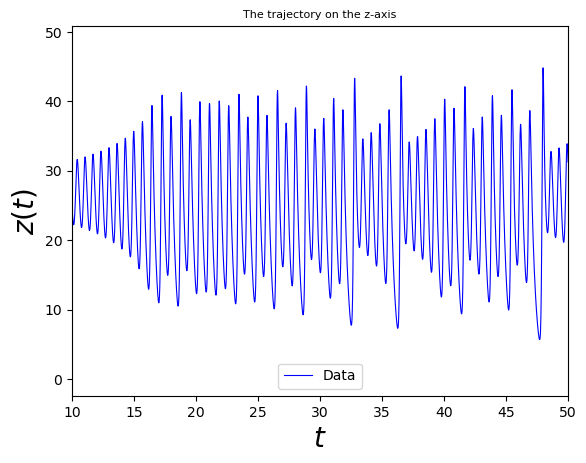

In [28]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$z(t)$', fontsize=20) # set the y label
ax.set_title('The trajectory on the z-axis', fontsize=8) # set the title 

# set aspect ratio: 
#ax.set_aspect(1)

# the limits: 
ax.set_xlim(10,50)
#ax.set_ylim(-10,-3)

# plot log(delta/delta0) versus t:
ax.plot(sol.t, sol.y[2], color='blue', linestyle='-', lw=0.8, label='Data')
ax.legend(loc='lower center')

Let's now find the local maxima: 

We will use SciPy's ```signal.argrelextrema```, which finds the indices on the array that correspond to the maxima. 

In [19]:
import scipy.signal

# for local maxima
maxloc = scipy.signal.argrelextrema(sol.y[2], np.greater)

# Let's plot them to make sure: 

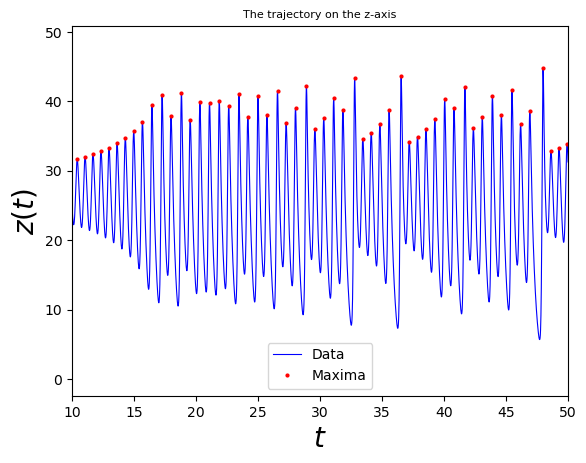

In [20]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$z(t)$', fontsize=20) # set the y label
ax.set_title('The trajectory on the z-axis', fontsize=8) # set the title 

# set aspect ratio: 
#ax.set_aspect(1)

# the limits: 
ax.set_xlim(10,50)
#ax.set_ylim(-10,-3)

# plot log(delta/delta0) versus t:
ax.plot(sol.t, sol.y[2], color='blue', linestyle='-', lw=0.8, label='Data')
# plot just the maxima:
ax.plot(sol.t[maxloc], sol.y[2][maxloc], color='red', linestyle='', label='Maxima', marker='o', ms=2)

ax.legend(loc='lower center')

That looks good! Let's now plot $z_{n+1}$ versus $z_n$: 

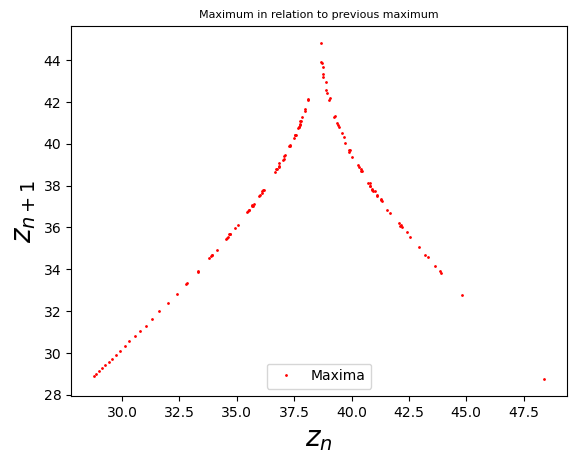

In [21]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$z_{n}$', fontsize=20) # set the x label
ax.set_ylabel(r'$z_{n+1}$', fontsize=20) # set the y label
ax.set_title('Maximum in relation to previous maximum', fontsize=8) # set the title 

# set aspect ratio: 
#ax.set_aspect(1)

# the limits: 
#ax.set_xlim(10,50)
#ax.set_ylim(-10,-3)

zmaxima = sol.y[2][maxloc]

# plot just the maxima:
ax.plot(zmaxima[:-1], zmaxima[1:], color='red', linestyle='', label='Maxima', marker='o', ms='1')

ax.legend(loc='lower center')

This is the Lorenz map! (See the original paper by Lorenz!). 